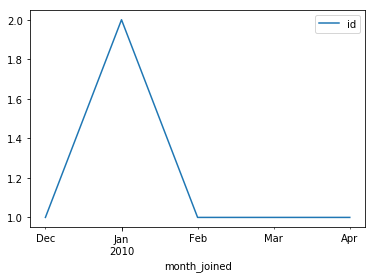

In [1]:
# Question 13 - Cleaning and analyzing employee data

# Below is a snippet from a table that contains information about employees that work at Company XYZ:

# employee_name 	employee_id 	date_joined 	age 	yrs_of_experience
# Andy 	123456 	2015-02-15 	45 	24
# Beth 	789456 	NaN 	36 	15
# Cindy 	654123 	2017-05-16 	34 	14
# Dale 	963852 	2018-01-15 	25 	4

# Company XYZ recently migrated database systems causing 
# 1) some of the date_joined records to be NULL.
# You're told by an analyst in human resources NULL records for
# the date_joined field indicates the employees joined prior to 2010.
# 2) You also find out there are multiple employees with the same name 
# 3) as well as duplicate records for some employees.

# Question:
# Can you write code using Python and the Pandas library that 
# finds the number of employees that joined each month?
# You can group all of the NULL values as having joined on Dec 1, 2009. 

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# mock up data
s = """name,id,date_joined,age,years_exp
andy,123456,2010-02-15,45,24
andy,987654,2010-04-08,18,0
beth,789456,NaN,36,15
cindy,654123,2010-01-16,34,14
cindy,654123,2010-03-16,34,14
cindy,147258,2010-03-16,66,22
dale,963852,2010-01-15,25,4
"""
df = pd.read_csv(pd.compat.StringIO(s), parse_dates=['date_joined'])
df = df.fillna(pd.to_datetime('2009-12-01'))
df['month_joined'] = df['date_joined'].values.astype('datetime64[M]') # https://stackoverflow.com/a/45304665
(
    df
    .groupby(['id']).agg({'month_joined':min})
    .reset_index()
    .groupby('month_joined').agg({'id':'nunique'})
    .plot()
)